# Filter

## Imports

In [12]:
import numpy as np
import plotly.express as px
import plotly.io as pio
from PIL import Image as im
import tkinter as tk
from tkinter import filedialog

pio.templates.default = 'plotly_dark'

## Functions

In [13]:
def draw(image, mode='rgb'):
    if mode == 'gray':
        color_scale = ['#000000', '#FFFFFF']
        px.imshow(image, color_continuous_scale=color_scale).update_layout(height=800).show()
    elif mode == 'rgb':
        px.imshow(image).update_layout(height=950).show()

In [14]:
def pixelate(img, pixel_size):
    width, height = img.size
    num_blocks_x = width // pixel_size
    num_blocks_y = height // pixel_size

    img = img.resize((num_blocks_x, num_blocks_y), resample=im.NEAREST)
    img = img.resize((width, height), resample=im.NEAREST)

    return img

In [15]:
def sliding_function(mat, kernel):
    mat = np.array(mat)
    kernel_size = kernel.shape[1]
    l = kernel_size // 2
    r = kernel_size-l

    height, width = mat.shape
    
    for h in range(height)[l:-r]:
        for w in range(width)[l:-r]:
            mat[h, w] = np.sum(mat[h-l:h+r, w-l:w+r] * kernel)

    return mat

In [29]:
def crt_effect(mat,intensity=1):

    height, width = mat.shape
    for h in range(height)[:-intensity:intensity*2]:
        for sub_h in range(intensity):
            mat[h+sub_h, :] -= mat[h+sub_h, :]//3
    return mat

In [23]:
def purpleise(hsv_arr):
    h = hsv_arr[:,:,0]
    s = hsv_arr[:,:,1]
    v = hsv_arr[:,:,2]

    k = v < 30
    h[k] = 210
    s[k] = 250
    v[k] = 200
    hsv_arr[:,:,0],hsv_arr[:,:,1],hsv_arr[:,:,2] = h,s,v

    return hsv_arr

## Image Open

In [32]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()

img = im.open(file_path)
hsv = img.convert('HSV')

# gray = np.array(img.convert('L'))

## Output

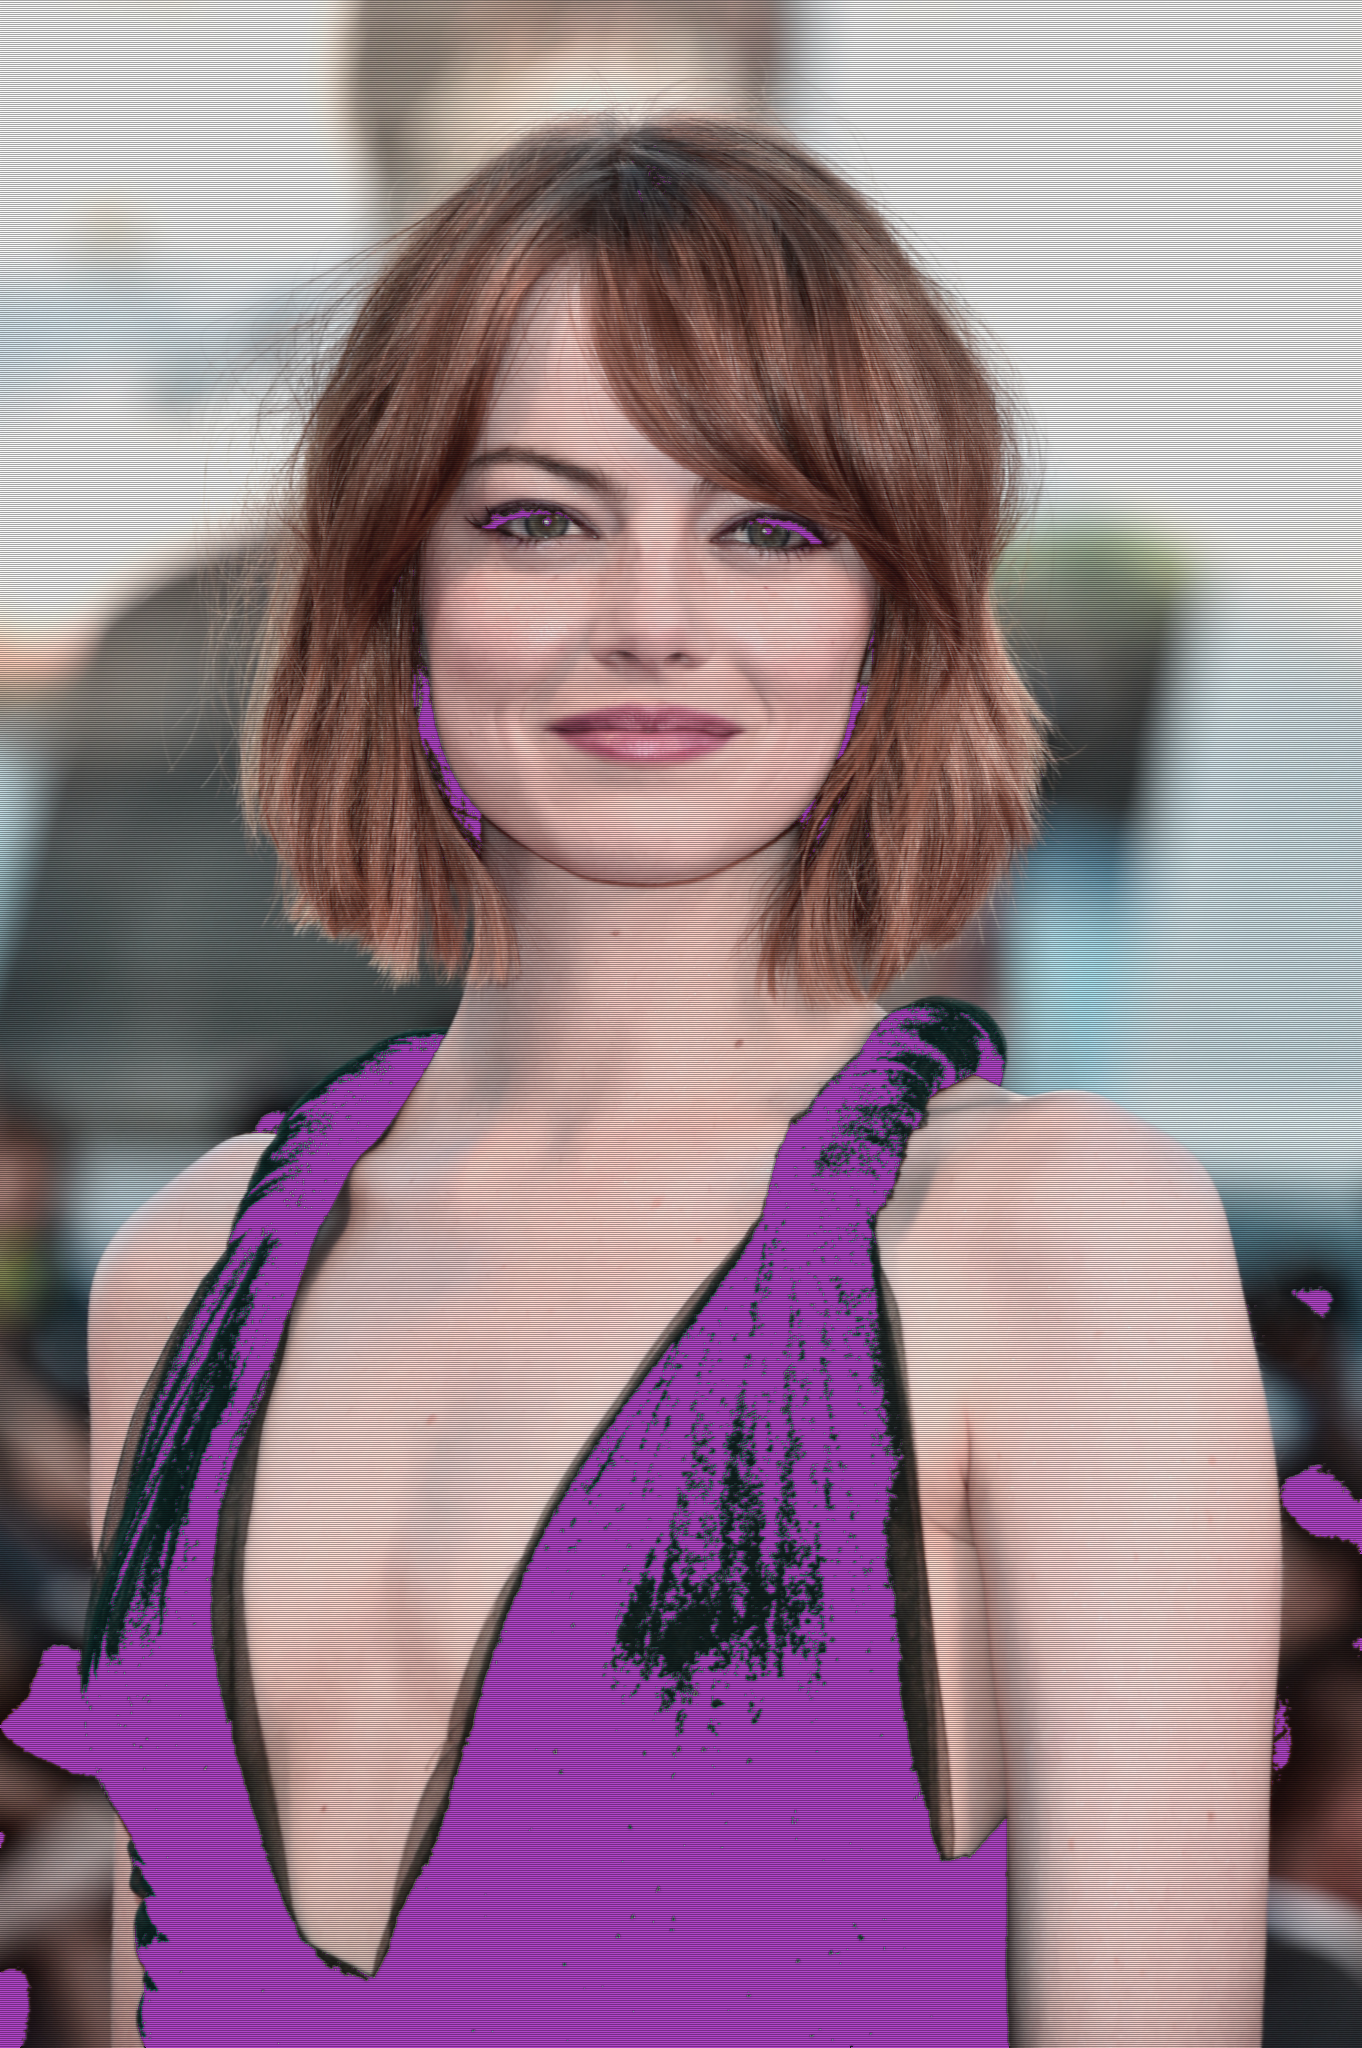

In [33]:
# kernel = np.array([[1,2,1], [2,-4,2], [1,2,1]])
# kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])

kernel = np.ones((3, 3))/9
# kernel[1, 1] = .25

hsv_arr = np.array(hsv)

hsv_arr = purpleise(hsv_arr)

gray = np.array(hsv_arr[:,:,2])

slide = sliding_function(gray, kernel)
crt = crt_effect(slide, intensity=1)

hsv_arr[:,:,0] = (hsv_arr[:,:,0] - 5) % 256
hsv_arr[:,:,1] = (hsv_arr[:,:,1] - hsv_arr[:,:,1] // 3) % 256
hsv_arr[:,:,2] = crt


result = im.fromarray(hsv_arr,'HSV').convert('RGB')

# draw(result,'rgb')
display(result)
# result.show()

In [34]:
f = filedialog.asksaveasfile(mode='w', defaultextension=".png",filetypes=[(".png","*.png"),(".jpg","*.jpg")])
if f:
    result.save(f.name)
f.close()